### Importing Libraries

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Dataset

In [129]:
df = pd.read_csv("Quote-Equity-RELIANCE-EQ-20-07-2024-to-20-07-2025.csv")
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,18-Jul-2025,EQ,"1,484.80","1,484.80","1,469.10","1,476.40","1,476.00","1,476.00","1,475.20","3,211.70","1,114.85","1,02,96,318","15,18,91,04,342.00","2,22,241"
1,17-Jul-2025,EQ,"1,487.40","1,489.60","1,473.90","1,485.60","1,478.70","1,476.40","1,479.78","3,211.70","1,114.85","1,18,54,613","17,54,22,05,685.80","1,89,733"
2,16-Jul-2025,EQ,"1,473.00","1,491.00","1,471.50","1,485.40","1,486.20","1,485.60","1,481.43","3,211.70","1,114.85","1,04,09,983","15,42,16,36,574.60","1,91,598"
3,15-Jul-2025,EQ,"1,486.20","1,496.50","1,482.40","1,483.70","1,488.50","1,485.40","1,487.92","3,211.70","1,114.85","81,32,454","12,10,04,48,372.90","1,73,756"
4,14-Jul-2025,EQ,"1,492.20","1,500.00","1,479.10","1,495.20","1,486.40","1,483.70","1,487.76","3,211.70","1,114.85","1,03,11,846","15,34,15,29,534.70","1,86,122"


### Exploring Data

In [131]:
print(df.columns.tolist())

['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ', 'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ', 'No of trades ']


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           249 non-null    object
 1   series         249 non-null    object
 2   OPEN           249 non-null    object
 3   HIGH           249 non-null    object
 4   LOW            249 non-null    object
 5   PREV. CLOSE    249 non-null    object
 6   ltp            249 non-null    object
 7   close          249 non-null    object
 8   vwap           249 non-null    object
 9   52W H          249 non-null    object
 10  52W L          249 non-null    object
 11  VOLUME         249 non-null    object
 12  VALUE          249 non-null    object
 13  No of trades   249 non-null    object
dtypes: object(14)
memory usage: 27.4+ KB


In [135]:
df.isnull().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

### Preprocessing

In [137]:
df["Date "]=pd.to_datetime(df["Date "])

In [139]:
df=df.sort_values("Date ")
df["Date "].head()

248   2024-07-22
247   2024-07-23
246   2024-07-24
245   2024-07-25
244   2024-07-26
Name: Date , dtype: datetime64[ns]

In [141]:
df.set_index("Date ",inplace=True)
df.head()

,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
Date,,,,,,,,,,,,,
2024-07-22,EQ,"3,074.50","3,075.00","2,998.55","3,110.30","3,004.00","3,001.35","3,016.24","3,217.60","2,220.30","98,37,188","29,67,13,39,998.45","4,65,224"
2024-07-23,EQ,"3,002.00","3,011.50","2,926.00","3,001.35","2,970.05","2,975.80","2,969.60","3,217.60","2,220.30","90,26,022","26,80,36,49,945.60","3,84,359"
2024-07-24,EQ,"2,970.00","3,019.00","2,952.80","2,975.80","2,988.00","2,991.40","2,987.68","3,217.60","2,220.30","59,56,681","17,79,66,51,407.60","2,32,120"
2024-07-25,EQ,"2,962.00","3,000.95","2,954.15","2,991.40","2,988.35","2,984.80","2,980.72","3,217.60","2,220.30","62,59,938","18,65,91,22,151.40","2,21,753"
2024-07-26,EQ,"2,984.80","3,024.85","2,980.70","2,984.80","3,018.60","3,018.05","3,012.08","3,217.60","2,220.30","49,29,970","14,84,94,80,970.80","1,80,757"


In [143]:
df.columns =[cols.strip().lower().replace(' ','_') for cols in df.columns]
df.head()

,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
Date,,,,,,,,,,,,,
2024-07-22,EQ,"3,074.50","3,075.00","2,998.55","3,110.30","3,004.00","3,001.35","3,016.24","3,217.60","2,220.30","98,37,188","29,67,13,39,998.45","4,65,224"
2024-07-23,EQ,"3,002.00","3,011.50","2,926.00","3,001.35","2,970.05","2,975.80","2,969.60","3,217.60","2,220.30","90,26,022","26,80,36,49,945.60","3,84,359"
2024-07-24,EQ,"2,970.00","3,019.00","2,952.80","2,975.80","2,988.00","2,991.40","2,987.68","3,217.60","2,220.30","59,56,681","17,79,66,51,407.60","2,32,120"
2024-07-25,EQ,"2,962.00","3,000.95","2,954.15","2,991.40","2,988.35","2,984.80","2,980.72","3,217.60","2,220.30","62,59,938","18,65,91,22,151.40","2,21,753"
2024-07-26,EQ,"2,984.80","3,024.85","2,980.70","2,984.80","3,018.60","3,018.05","3,012.08","3,217.60","2,220.30","49,29,970","14,84,94,80,970.80","1,80,757"


In [145]:
df.drop(columns=['no_of_trades', '52w_h', '52w_l', 'prev._close'],inplace=True)

In [147]:
df.head()

,series,open,high,low,ltp,close,vwap,volume,value
Date,,,,,,,,,
2024-07-22,EQ,"3,074.50","3,075.00","2,998.55","3,004.00","3,001.35","3,016.24","98,37,188","29,67,13,39,998.45"
2024-07-23,EQ,"3,002.00","3,011.50","2,926.00","2,970.05","2,975.80","2,969.60","90,26,022","26,80,36,49,945.60"
2024-07-24,EQ,"2,970.00","3,019.00","2,952.80","2,988.00","2,991.40","2,987.68","59,56,681","17,79,66,51,407.60"
2024-07-25,EQ,"2,962.00","3,000.95","2,954.15","2,988.35","2,984.80","2,980.72","62,59,938","18,65,91,22,151.40"
2024-07-26,EQ,"2,984.80","3,024.85","2,980.70","3,018.60","3,018.05","3,012.08","49,29,970","14,84,94,80,970.80"


### EDA

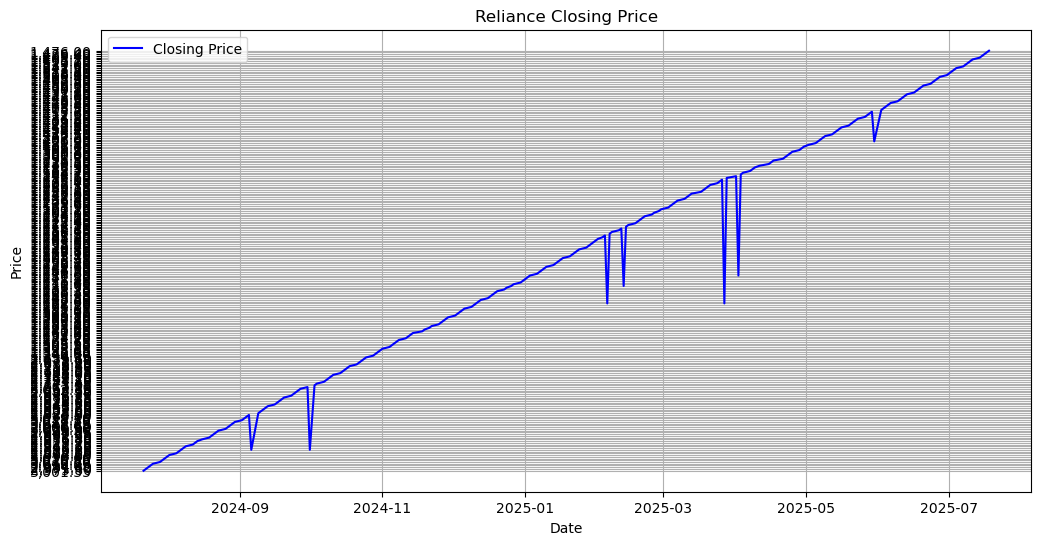

In [149]:
plt.figure(figsize=(12,6))
plt.plot(df['close'],label='Closing Price',color="blue")
plt.title("Reliance Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()

### Feature Engineering

In [151]:
df["close_lag_1"]=df["close"].shift(1)#create lag features (previous day's close)
df.dropna(inplace=True)
df.head()

,series,open,high,low,ltp,close,vwap,volume,value,close_lag_1
Date,,,,,,,,,,
2024-07-23,EQ,"3,002.00","3,011.50","2,926.00","2,970.05","2,975.80","2,969.60","90,26,022","26,80,36,49,945.60","3,001.35"
2024-07-24,EQ,"2,970.00","3,019.00","2,952.80","2,988.00","2,991.40","2,987.68","59,56,681","17,79,66,51,407.60","2,975.80"
2024-07-25,EQ,"2,962.00","3,000.95","2,954.15","2,988.35","2,984.80","2,980.72","62,59,938","18,65,91,22,151.40","2,991.40"
2024-07-26,EQ,"2,984.80","3,024.85","2,980.70","3,018.60","3,018.05","3,012.08","49,29,970","14,84,94,80,970.80","2,984.80"
2024-07-29,EQ,"3,023.90","3,055.00","3,023.55","3,038.25","3,040.20","3,038.43","37,69,275","11,45,26,61,155.40","3,018.05"


In [153]:
for col in df.drop("series",axis=1).columns:
    df[col] = df[col].astype(str).str.replace(',', '')# converting string values to float of 12,233,21.32 to 1223321.32
    df[col] = df[col].astype(float)

In [155]:
df.head()

,series,open,high,low,ltp,close,vwap,volume,value,close_lag_1
Date,,,,,,,,,,
2024-07-23,EQ,3002.0,3011.50,2926.00,2970.05,2975.80,2969.60,9026022.0,2.680365e+10,3001.35
2024-07-24,EQ,2970.0,3019.00,2952.80,2988.00,2991.40,2987.68,5956681.0,1.779665e+10,2975.80
2024-07-25,EQ,2962.0,3000.95,2954.15,2988.35,2984.80,2980.72,6259938.0,1.865912e+10,2991.40
2024-07-26,EQ,2984.8,3024.85,2980.70,3018.60,3018.05,3012.08,4929970.0,1.484948e+10,2984.80
2024-07-29,EQ,3023.9,3055.00,3023.55,3038.25,3040.20,3038.43,3769275.0,1.145266e+10,3018.05


### Model Building

In [157]:
features = ['open', 'high', 'low', 'vwap', 'volume', 'close_lag_1']
target = 'close'

X = df[features]
y = df[target]

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [161]:
# Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Final prediction & conclusion

In [163]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

RMSE: 4.2754511819176235
R2 Score: 0.9877906113363368


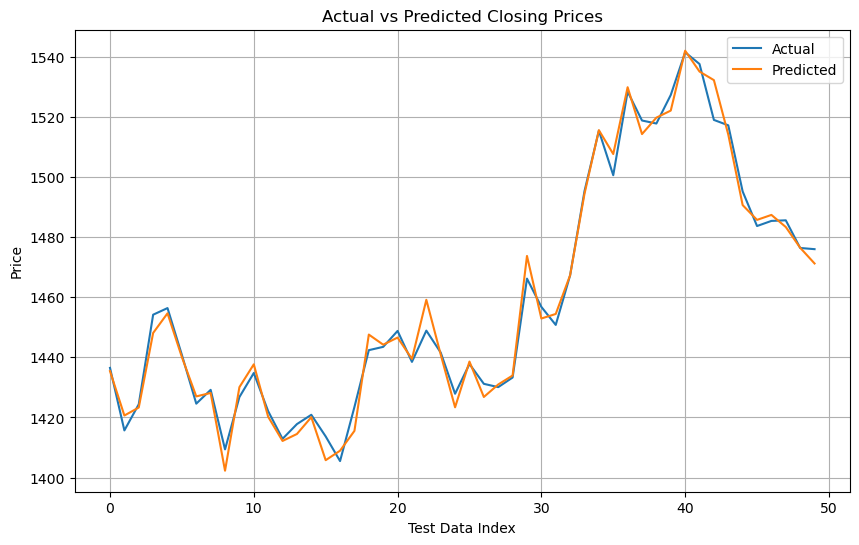

In [165]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.xlabel("Test Data Index")
plt.ylabel("Price")
plt.grid()
plt.show()

### Predict on Single Input

In [167]:
sample = X.iloc[-1:].copy()
predicted_close = model.predict(sample)
print("Predicted Close:", predicted_close[0])

Predicted Close: 1471.2426421889013
